# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Sacramento.

Start by [downloading](https://trello-attachments.s3.amazonaws.com/5679b2e91535c674fadb2efe/56b39dbfc8bbe91b11d49e9f/bb26a8e51e1bb392f94c7d7f045b875c/Sacramentorealestatetransactions.csv) the data.

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [4]:
%matplotlib inline
import pandas as pd

filename = "Sacramentorealestatetransactions.csv"

data = pd.read_csv(filename)

data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


## Exploratory Analysis

Use pandas to look through the data. Plot the variables as histograms or pairs in scatter plots as needed with matplotlib, pandas, or seaborn until you understand each one.

In [19]:

data.columns

Index([u'street', u'city', u'zip', u'state', u'beds', u'baths', u'sq__ft',
       u'type', u'sale_date', u'price', u'latitude', u'longitude'],
      dtype='object')

## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price". You can use pandas, matplotlib, or seaborn.

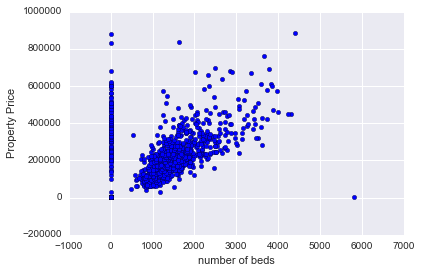

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt

x = data['sq__ft']
y = data['price']

plt.scatter(x, y)
plt.xlabel("number of beds")
plt.ylabel("Property Price")
plt.show()

In [34]:
data2= data[['beds','baths','sq__ft','latitude','longitude','price']]
data2.head()

,beds,baths,sq__ft,latitude,longitude,price
0,2,1,836,38.631913,-121.434879,59222
1,3,1,1167,38.478902,-121.431028,68212
2,2,1,796,38.618305,-121.443839,68880
3,2,1,852,38.616835,-121.439146,69307
4,2,1,797,38.519470,-121.435768,81900


## Regressions

* Perform a series of regressions on various combinations of the independent variables.
* Plot the predicted values versus the true values
* Which combinations gives the best fit?

You can use either scikit-learn or statsmodels

In [53]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
lm = linear_model.LinearRegression()
lst=[]

for i in data2.columns:
    for j in data2.columns:
        for k in data2.columns:
            x=data2[[i,j,k]]
            y=data2["price"]
            model= lm.fit(x,y)
            predictions= model.predict(x)
            print ("For {}, {} and {}, MSE: {}".format(i,j,k,mean_squared_error(y,predictions)))
            lst.append(float(mean_squared_error(y,predictions)))
        
lst.order(MSE)

For beds, beds and beds, MSE: 16888339262.8
For beds, beds and baths, MSE: 15808951699.8
For beds, beds and sq__ft, MSE: 16529336403.9
For beds, beds and latitude, MSE: 16812949592.3
For beds, beds and longitude, MSE: 15127860407.3
For beds, beds and price, MSE: 7.90318473746e-21
For beds, baths and beds, MSE: 15808951699.8
For beds, baths and baths, MSE: 15808951699.8
For beds, baths and sq__ft, MSE: 15672340299.9
For beds, baths and latitude, MSE: 15742900660.8
For beds, baths and longitude, MSE: 14329881393.8
For beds, baths and price, MSE: 1.57585399604e-20
For beds, sq__ft and beds, MSE: 16529336403.9
For beds, sq__ft and baths, MSE: 15672340299.9
For beds, sq__ft and sq__ft, MSE: 16529336403.9
For beds, sq__ft and latitude, MSE: 16328237108.2
For beds, sq__ft and longitude, MSE: 14367264712.7
For beds, sq__ft and price, MSE: 4.65385973367e-21
For beds, latitude and beds, MSE: 16812949592.3
For beds, latitude and baths, MSE: 15742900660.8
For beds, latitude and sq__ft, MSE: 163282

AttributeError: 'list' object has no attribute 'order'

## Bonus Exercises

* Find the best model you can with the three variables
* Are longitude and latitude useful separately? Try adding each and both to another model and look for mean_squared_error improvement
* Can you find any significant correlations between the non-price variables? Which ones?

In [ ]:
These